# **Capstone Project : GejalaKu**

## Import Library & Packages

In [1]:
import numpy as np
import pandas as pd

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

import warnings
warnings.filterwarnings('ignore')

## Data Loading

Mengimport dataset yang sudah bersih dari google drive

In [2]:
# import dataset penyakit dan gejalanya
url1='https://drive.google.com/file/d/1rn3qjDsP_3SBsM_nJQoK272_sPH42uWt/view?usp=sharing'
url1='https://drive.google.com/uc?id=' + url1.split('/')[-2]
df_disease = pd.read_csv(url1)
df_disease.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Infeksi jamur,gatal,ruam kulit,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Infeksi jamur,ruam kulit,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Infeksi jamur,gatal,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Infeksi jamur,gatal,ruam kulit,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Infeksi jamur,gatal,ruam kulit,erupsi kulit nodular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# import dataset obat dan penyakitnya
url2='https://drive.google.com/file/d/1OyXvR8vToPlnfmNi2US1PI203b3VooJn/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url2.split('/')[-2]
df_drug = pd.read_csv(url2)
df_drug.head()

,disease,drug
0,GERD (refluks asam lambung),omeprazole
1,GERD (refluks asam lambung),pantoprazole
2,GERD (refluks asam lambung),ranitidine
3,GERD (refluks asam lambung),famotidine
4,GERD (refluks asam lambung),lansoprazole


In [4]:
# import dataset penyakit dan deskripsinya
url3='https://drive.google.com/file/d/1EV_i7LnoArlKDLpsUy5h8xs3ik05S4f_/view?usp=sharing'
url3='https://drive.google.com/uc?id=' + url3.split('/')[-2]
df_disease_description = pd.read_csv(url3)
df_disease_description.head()

,Disease,Description
0,Reaksi obat,Reaksi obat yang merugikan (ADR) adalah cedera...
1,Malaria,Penyakit menular yang disebabkan oleh parasit ...
2,Alergi,Alergi adalah respons sistem kekebalan tubuh t...
3,Hipotiroidisme,"Hipotiroidisme, juga disebut tiroid yang kuran..."
4,Psoriasis,Psoriasis adalah kelainan kulit umum yang memb...


In [5]:
# import dataset penyakit dan pertolongan pertama (precaution)
url4='https://drive.google.com/file/d/1X3YzhAdz4b7v_Bj7-MBUYJ-qYO8v-MJl/view?usp=sharing'
url4='https://drive.google.com/uc?id=' + url4.split('/')[-2]
df_disease_precaution = pd.read_csv(url4)
df_disease_precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Reaksi obat,Hentikan iritasi,Konsultasikan dengan rumah sakit terdekat,berhenti minum obat,menindaklanjuti
1,Malaria,Konsultasikan dengan rumah sakit terdekat,Hindari makanan berminyak,Hindari Makanan Non Veget,Jauhkan nyamuk
2,Alergi,Terapkan Calamine,Area penutup dengan perban,NaN,Gunakan es untuk mengompres gatal
3,Hipotiroidisme,mengurangi stres,latihan,makan sehat,tidur nyenyak
4,Psoriasis,Cuci tangan dengan air sabun hangat,Hentikan Pendarahan Menggunakan Tekanan,Konsultasikan dengan dokter,mandi garam


## Exploratory Data Analysis

In [6]:
df_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     304 non-null    object
 1   Symptom_1   304 non-null    object
 2   Symptom_2   304 non-null    object
 3   Symptom_3   304 non-null    object
 4   Symptom_4   272 non-null    object
 5   Symptom_5   234 non-null    object
 6   Symptom_6   186 non-null    object
 7   Symptom_7   158 non-null    object
 8   Symptom_8   140 non-null    object
 9   Symptom_9   120 non-null    object
 10  Symptom_10  110 non-null    object
 11  Symptom_11  68 non-null     object
 12  Symptom_12  47 non-null     object
 13  Symptom_13  30 non-null     object
 14  Symptom_14  19 non-null     object
 15  Symptom_15  18 non-null     object
 16  Symptom_16  10 non-null     object
 17  Symptom_17  1 non-null      object
dtypes: object(18)
memory usage: 42.9+ KB


In [7]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   disease  278 non-null    object
 1   drug     278 non-null    object
dtypes: object(2)
memory usage: 4.5+ KB


In [10]:
df_disease_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [12]:
df_disease_precaution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [8]:
df_disease.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,304,304,304,304,272,234,186,158,140,120,110,68,47,30,19,18,10,1
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Migrain,muntah,muntah,kelelahan,demam tinggi,sakit kepala,mual,nyeri perut,mata menguning,rasa tidak enak badan,mata menguning,pernah injeksi tidak steril,rasa tidak enak badan,bintik merah di tubuh,nyeri dada,darah di dahak,nyeri otot,nyeri otot
freq,10,46,56,46,30,24,21,22,16,17,11,8,11,8,16,8,8,1


In [9]:
df_drug.describe()

,disease,drug
count,278,278
unique,41,214
top,Diabetes,doxycycline
freq,18,5


In [13]:
df_disease.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,32
Symptom_5,70
Symptom_6,118
Symptom_7,146
Symptom_8,164
Symptom_9,184


In [14]:
df_drug.isnull().sum()

,0
disease,0
drug,0


In [15]:
df_disease.duplicated().sum()

np.int64(0)

In [16]:
df_drug.duplicated().sum()

np.int64(4)

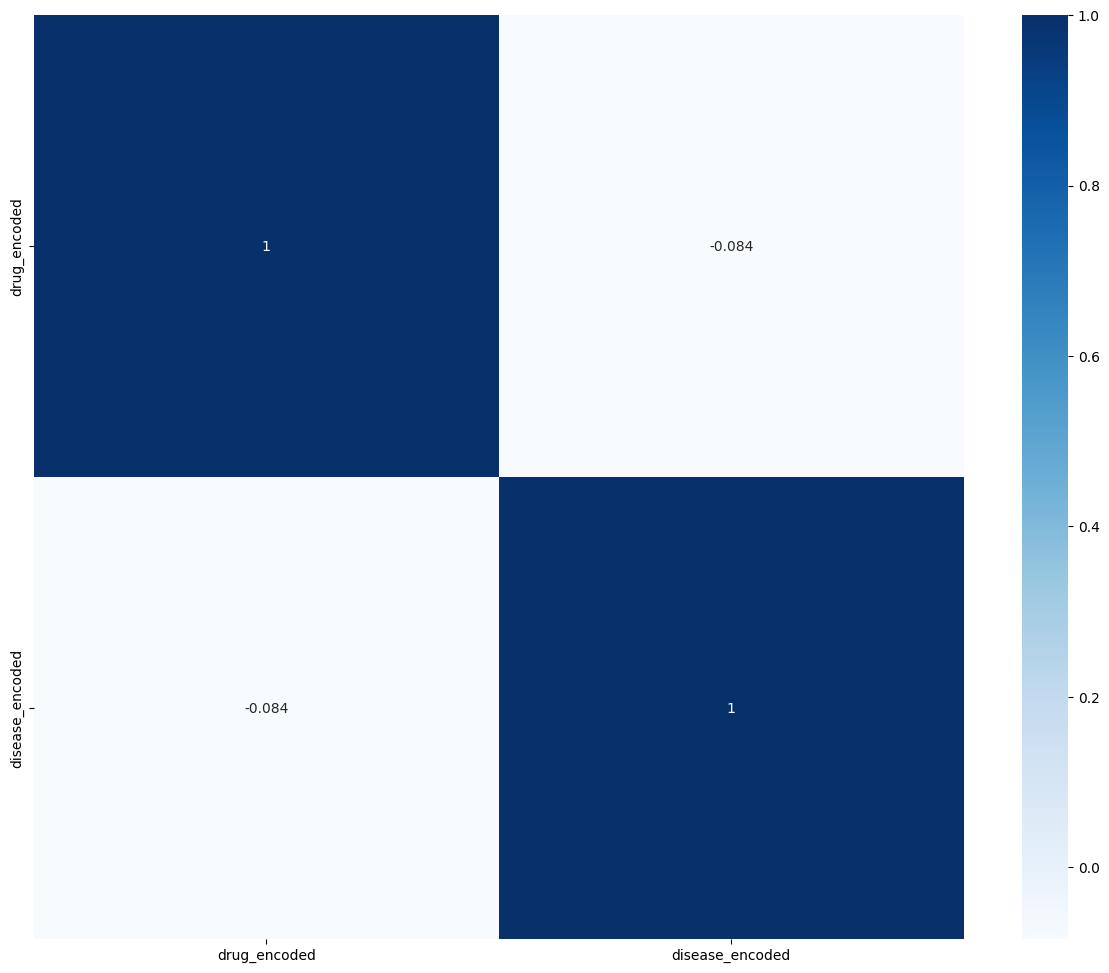

In [17]:
# Korelasi antar variabel numerik dan melihat korelasi pada tiap fitur
plt.figure(figsize=(15,12))
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_drug['drug_encoded'] = label_encoder.fit_transform(df_drug['drug'])
df_drug['disease_encoded'] = label_encoder.fit_transform(df_drug['disease'])

drugs_encoded = ['drug_encoded', 'disease_encoded']
sns.heatmap(df_drug[drugs_encoded].corr(), cmap='Blues', annot=True)
plt.show()

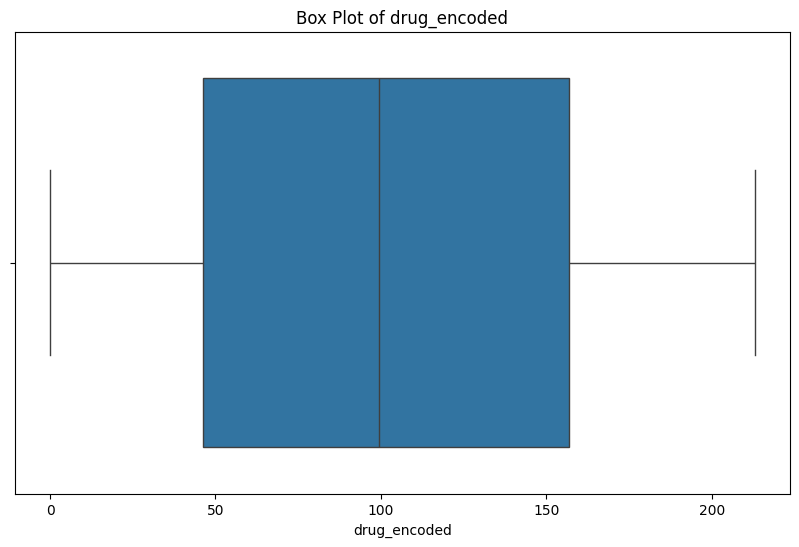

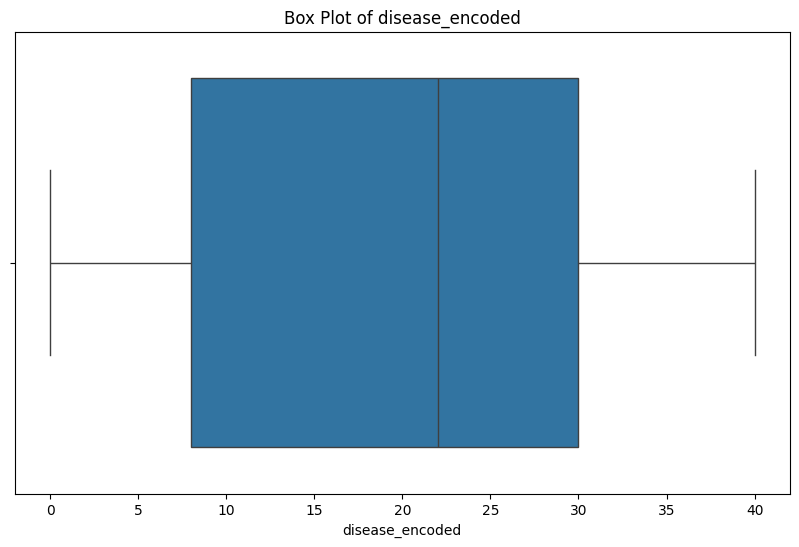

In [18]:
drugs_encoded = ['drug_encoded', 'disease_encoded']
for feature in drugs_encoded:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_drug[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

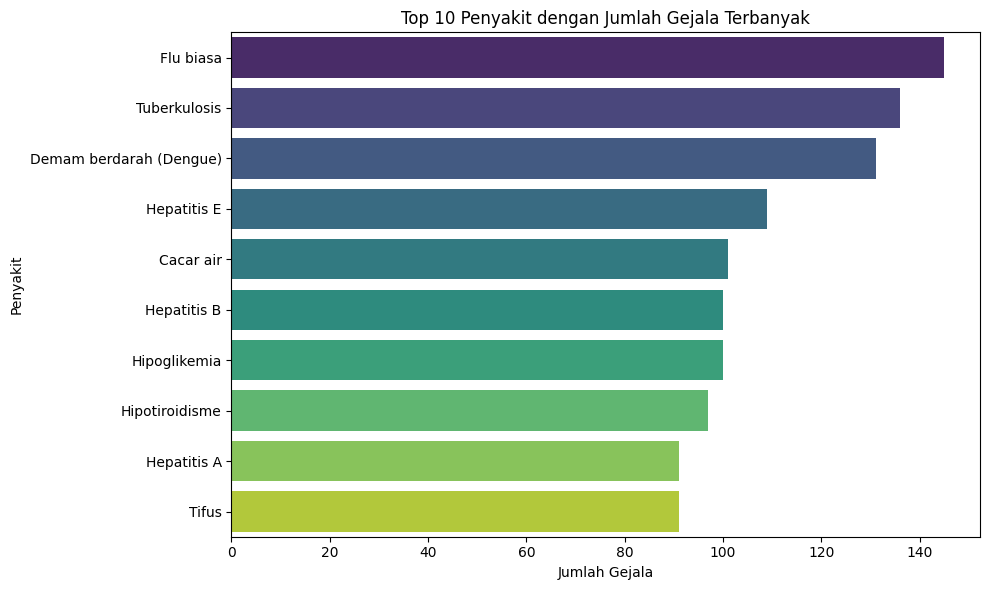

In [19]:
#Penyakit dengan jumlah gejala terbanyak
# Hitung jumlah symptom yang tidak null per penyakit
df_disease['num_symptoms'] = df_disease.iloc[:, 1:].notnull().sum(axis=1)

# Hitung total symptom per penyakit
disease_symptom_count = df_disease.groupby('Disease')['num_symptoms'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=disease_symptom_count.values, y=disease_symptom_count.index, palette='viridis')
plt.title('Top 10 Penyakit dengan Jumlah Gejala Terbanyak')
plt.xlabel('Jumlah Gejala')
plt.ylabel('Penyakit')
plt.tight_layout()
plt.show()

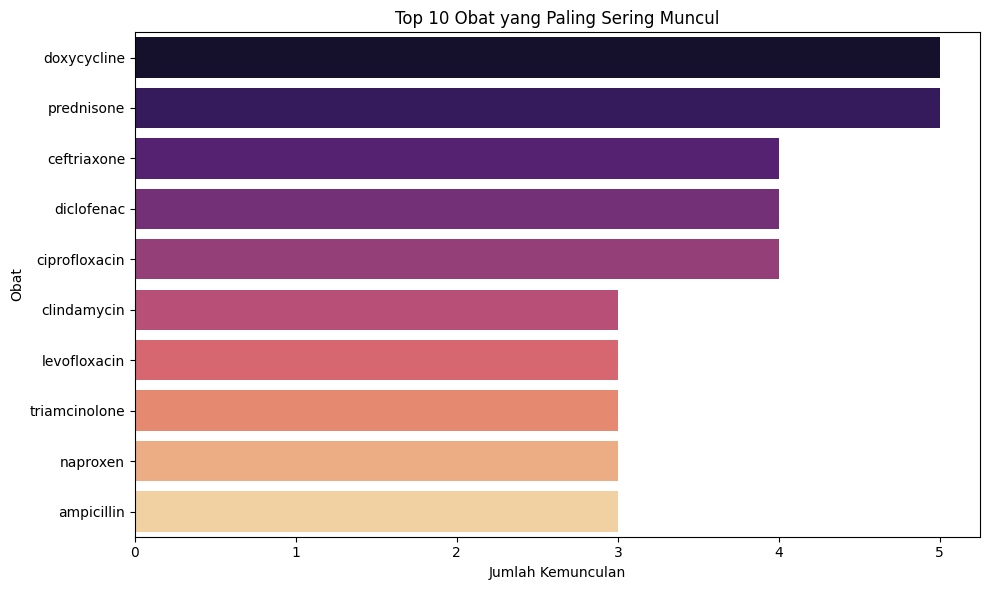

In [20]:
# Obat yang paling sering muncul di df_drug
top_drugs = df_drug['drug'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='magma')
plt.title('Top 10 Obat yang Paling Sering Muncul')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Obat')
plt.tight_layout()
plt.show()

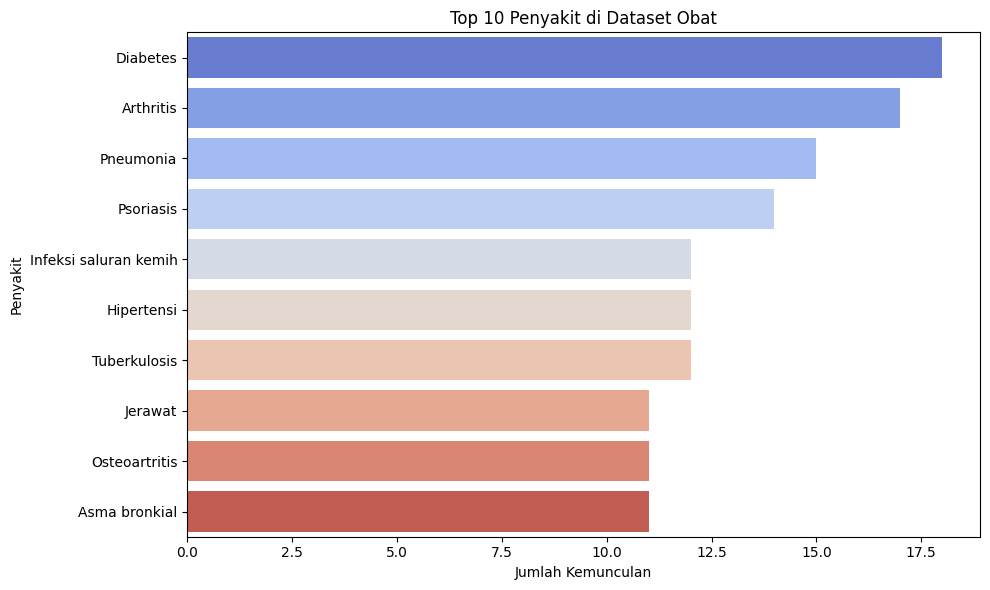

In [21]:
# Penyakit yang paling sering muncul di df_drug
top_diseases = df_drug['disease'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_diseases.values, y=top_diseases.index, palette='coolwarm')
plt.title('Top 10 Penyakit di Dataset Obat')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Penyakit')
plt.tight_layout()
plt.show()